In [2]:
# Graph Analysis
import pandas as pd
# df = pd.read_csv('kol_features.csv')

In [3]:
# df_list = pd.read_csv('kol_info.csv')

In [4]:
# df[['ig_id', 'following_list', 'is_HK']]
# df.drop(df.loc[df.following_list ==  "yet"].index, inplace=True)
# df.drop(df.loc[df.following_list ==  "[]"].index, inplace=True)
# df = df[['ig_id', 'name', 'following_list', 'is_HK', 'no_of_follower']].reset_index(drop=True)

In [5]:
# table for Gephi - > edged table
# count = 0
# column_names = ["Target", "Source", "is_HK", "no_of_follower"]
# df2 = pd.DataFrame(columns = column_names)
# for x in df['ig_id'].to_list():
#     df['ig_id'].iloc[count]
#     df['is_HK'].iloc[count]
#     df['no_of_follower'].iloc[count]
#     df['following_list'].iloc[count]
#     convertlist = df['following_list'].iloc[count].replace('\'', '').replace('[', '').replace(']', '').replace('\"', '').split(', ')
#     df_temp = pd.DataFrame(convertlist).rename(columns={0:'Target'})
#     df_temp['Source'] = df['ig_id'].iloc[count]
#     df_temp['is_HK']= df['is_HK'].iloc[count]
#     df_temp['no_of_follower'] = df['no_of_follower'].iloc[count]
#     df2 = pd.concat([df_temp, df2], join="inner")
#   count = count+1

In [6]:
# kill_list
# kill_list = []
# for x in df2['Target'].to_list():
#     if x in df_list['ig_id'].to_list():
#         pass
#     else:
#         kill_list.append(x)

In [7]:
# df2 = df2[['Source', 'Target']].set_index('Target')    

In [8]:
# count = 0
# for y in kill_list:
#     try: 
#         df2.drop(y)
#         print(count)
#         count += 1
#     except: 
#         pass

In [10]:
df2 = pd.read_csv('temp.csv').reset_index()

In [11]:
# after that we continue to do the whole of picture
edge_tuples = df2[["Source", "Target"]].itertuples(index=False, name=None)

In [12]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edge_tuples)

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18,6)

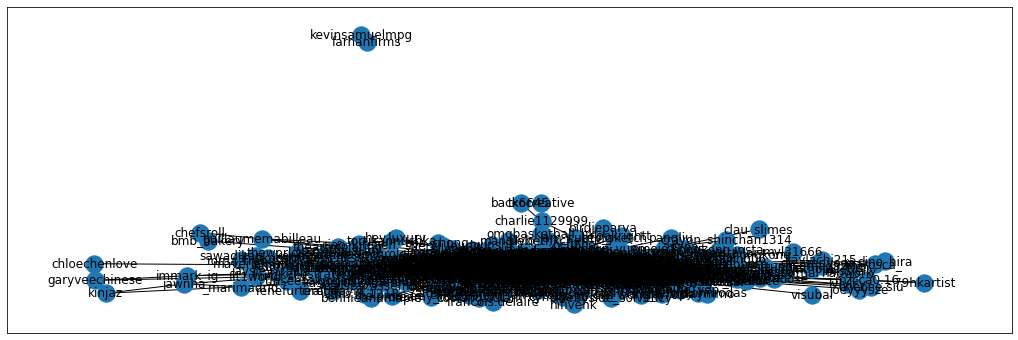

In [14]:
nx.draw_networkx(G)

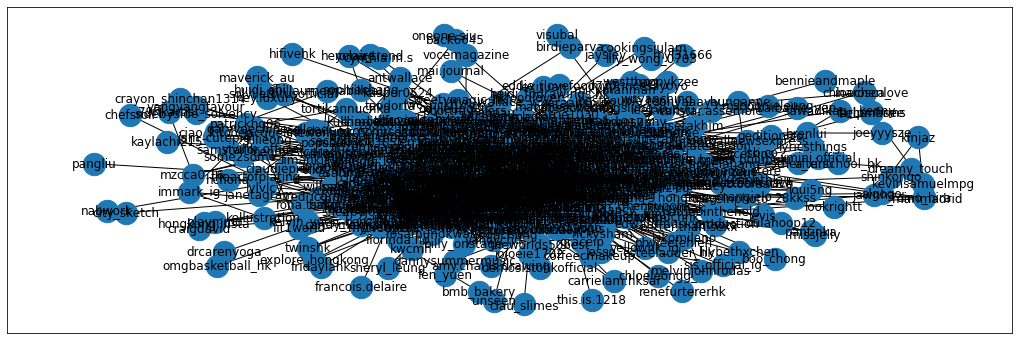

In [15]:
pos = nx.spring_layout(G,iterations=1000, k = 5)
nx.draw_networkx_nodes(G,pos,node_size=500)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G,pos)
pass

In [16]:
nx.is_connected(G)

False

In [19]:
# nx.center(G)
# not connect will not show

In [20]:
# Commuity is the core point for us to analyze
from networkx.algorithms import community

barbell_G = nx.barbell_graph(5, 1)

communities_generator = community.girvan_newman(barbell_G)

top_level_communities = next(communities_generator)

next_level_communities = next(communities_generator)

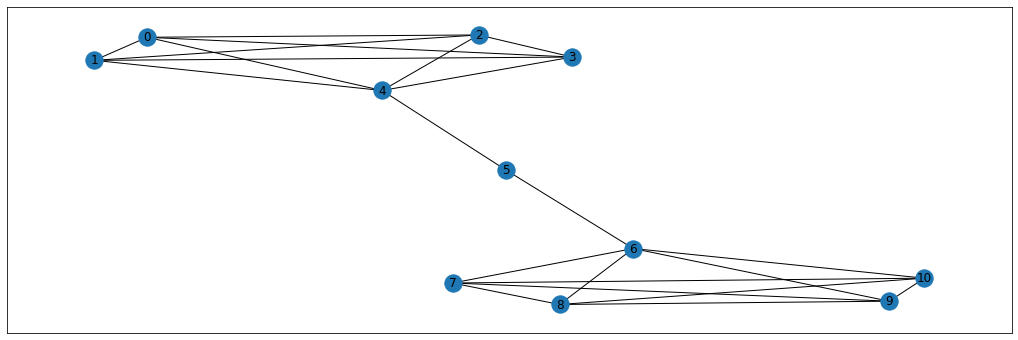

In [21]:
nx.draw_networkx(barbell_G)

In [22]:
top_level_communities

({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9, 10})

In [23]:
next_level_communities

({0, 1, 2, 3, 4}, {6, 7, 8, 9, 10}, {5})

In [26]:
from networkx.algorithms.community import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

In [27]:
print("Number of groups:" , len(c))
print("Group sizes:" , list(map(len, c)))

Number of groups: 9
Group sizes: [339, 200, 89, 29, 5, 2, 2, 2, 2]
